In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
import pandas as pd
from fbprophet import Prophet

# Data Load

## Using os package

In [9]:
p = os.getcwd()
print(p)

/content


In [10]:
os.listdir(p)

['.config', 'drive', 'sample_data']

In [15]:
data_dir = os.path.join(os.getcwd(), "drive", "MyDrive", "Multi", "Data")
data_dir

'/content/drive/MyDrive/Multi/Data'

In [18]:
# os.path의 is file method.
# 해당 경로가 파일인지 확인하는 method입니다. 비슷한 method로 isdir 등이 있습니다.
f_names = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))]
f_names

['/content/drive/MyDrive/Multi/Data/아파트매매가격지수_경기도_10년.csv']

In [19]:
os.listdir(data_dir)

['아파트매매가격지수_경기도_10년.csv']

## Opening csv data file

In [101]:
data = pd.read_csv(f_names[0])
data.head()

,date,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,...,용인시,파주시,이천시,안성시,김포시,화성시,광주시,양주시,포천시,여주시
0,2013-01-01,63.4,67.8,77.7,60.5,68.1,53.0,92.6,92.6,66.8,...,68.8,82.3,89.2,92.6,71.1,73.0,82.4,82.0,93.6,102.8
1,2013-02-01,63.3,67.2,77.4,60.2,67.7,52.9,92.5,90.9,66.6,...,68.5,81.9,89.4,92.8,70.9,72.9,82.0,81.7,93.6,102.8
2,2013-03-01,63.2,66.9,76.9,60.0,67.4,52.6,92.4,90.1,66.3,...,68.4,81.6,89.7,92.8,70.8,72.8,81.9,81.4,93.6,102.7
3,2013-04-01,63.3,67.1,76.4,59.8,67.4,52.6,92.4,90.0,66.3,...,68.4,80.6,90.1,93.5,70.7,73.2,82.3,81.7,93.9,102.7
4,2013-05-01,63.4,67.5,76.4,59.6,67.6,52.9,92.4,89.8,66.6,...,68.5,80.7,90.4,93.8,71.0,73.6,82.3,81.9,94.7,103.6


# FaceBook PROPHET Basic

## Format the Data

In [102]:
df = data[['date', '수원시']]

In [103]:
df.columns = ['ds','y']

In [104]:
df['ds'] = pd.to_datetime(df['ds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Create and Fit Model

In [105]:
train = df.iloc[:98]
test = df.iloc[98:]

In [119]:
m = Prophet(changepoint_range=0.8, changepoint_prior_scale=0.01)
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


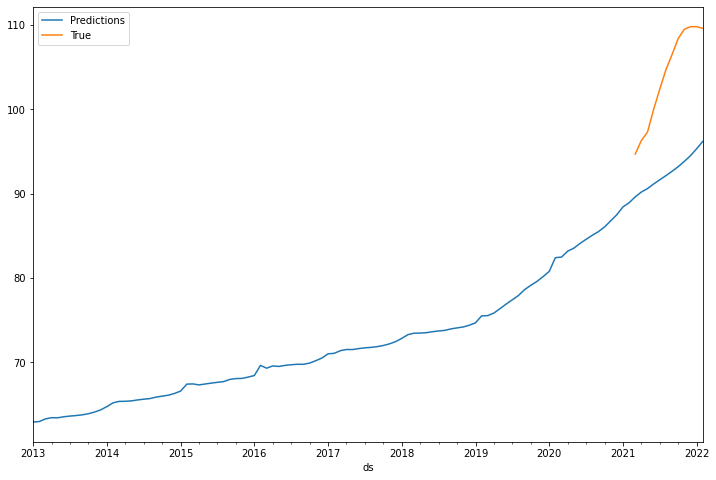

In [120]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True',legend=True,ax=ax,xlim=('2013-01-01','2022-02-01'))

In [121]:
m = Prophet(changepoint_range=0.8, changepoint_prior_scale=0.05)
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


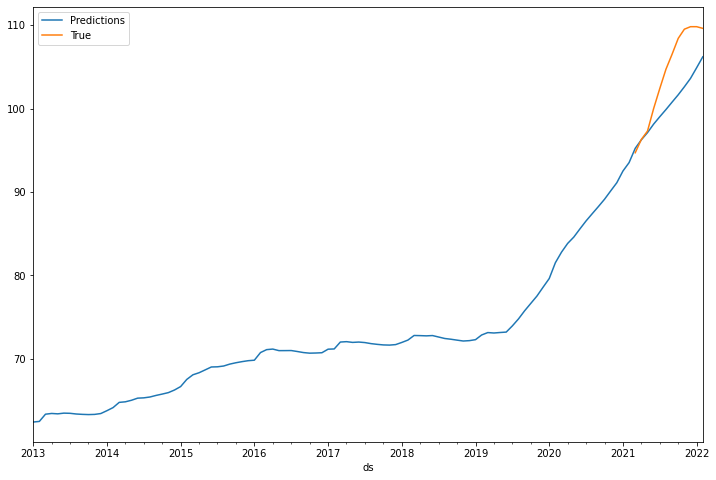

In [122]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True',legend=True,ax=ax,xlim=('2013-01-01','2022-02-01'))

In [124]:
df.head()

,ds,y
0,2013-01-01,63.4
1,2013-02-01,63.3
2,2013-03-01,63.2
3,2013-04-01,63.3
4,2013-05-01,63.4


### Step 1: Create "future" placeholder dataframe

In [125]:
df.tail()

,ds,y
105,2021-10-01,108.4
106,2021-11-01,109.5
107,2021-12-01,109.8
108,2022-01-01,109.8
109,2022-02-01,109.6


In [126]:
future.tail()

,ds
105,2021-10-01
106,2021-11-01
107,2021-12-01
108,2022-01-01
109,2022-02-01


In [127]:
len(df)

110

In [128]:
len(future)


110

### Step 2: Predict and fill in the Future

In [129]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,62.668376,61.215628,63.744921,62.668376,62.668376,-0.221453,-0.221453,-0.221453,-0.221453,-0.221453,-0.221453,0.0,0.0,0.0,62.446924
1,2013-02-01,62.793789,61.212886,63.812451,62.793789,62.793789,-0.273653,-0.273653,-0.273653,-0.273653,-0.273653,-0.273653,0.0,0.0,0.0,62.520137
2,2013-03-01,62.907066,62.161342,64.671222,62.907066,62.907066,0.478993,0.478993,0.478993,0.478993,0.478993,0.478993,0.0,0.0,0.0,63.386059
3,2013-04-01,63.032479,62.249664,64.709241,63.032479,63.032479,0.441199,0.441199,0.441199,0.441199,0.441199,0.441199,0.0,0.0,0.0,63.473678
4,2013-05-01,63.153847,62.288143,64.640145,63.153847,63.153847,0.274312,0.274312,0.274312,0.274312,0.274312,0.274312,0.0,0.0,0.0,63.428158


In [130]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
105,2021-10-01,102.077267,100.306241,102.945487,101.474443,102.681575,-0.433279,-0.433279,-0.433279,-0.433279,-0.433279,-0.433279,0.0,0.0,0.0,101.643988
106,2021-11-01,103.138547,101.119506,104.099197,102.392110,103.867704,-0.536955,-0.536955,-0.536955,-0.536955,-0.536955,-0.536955,0.0,0.0,0.0,102.601592
107,2021-12-01,104.165593,102.064781,105.266689,103.280194,105.034912,-0.556315,-0.556315,-0.556315,-0.556315,-0.556315,-0.556315,0.0,0.0,0.0,103.609278
108,2022-01-01,105.226873,103.244046,106.515595,104.167033,106.204661,-0.339631,-0.339631,-0.339631,-0.339631,-0.339631,-0.339631,0.0,0.0,0.0,104.887242
109,2022-02-01,106.288154,104.452381,108.145328,105.079126,107.410983,-0.095325,-0.095325,-0.095325,-0.095325,-0.095325,-0.095325,0.0,0.0,0.0,106.192829


In [131]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [132]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
98,2021-03-01,95.230002,93.948978,96.409535
99,2021-04-01,96.253488,94.878437,97.562001
100,2021-05-01,97.113646,95.842379,98.385881
101,2021-06-01,98.133711,96.838569,99.342983
102,2021-07-01,99.018443,97.777364,100.289978
103,2021-08-01,99.872199,98.571951,101.225104
104,2021-09-01,100.764518,99.439749,102.105994
105,2021-10-01,101.643988,100.306241,102.945487
106,2021-11-01,102.601592,101.119506,104.099197
107,2021-12-01,103.609278,102.064781,105.266689


### Plotting Forecast

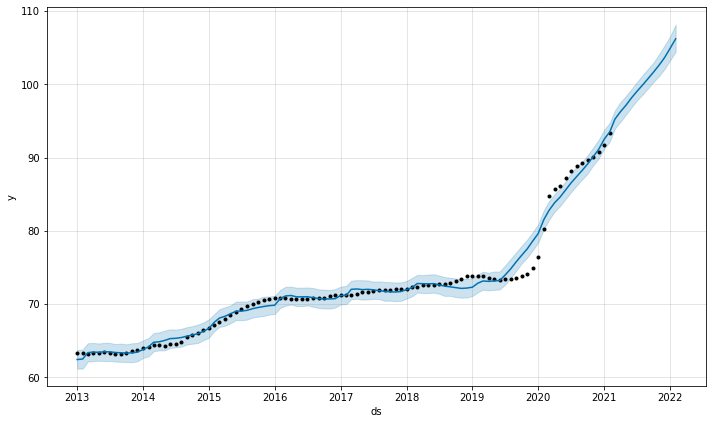

In [133]:
m.plot(forecast);

ConversionError: ignored

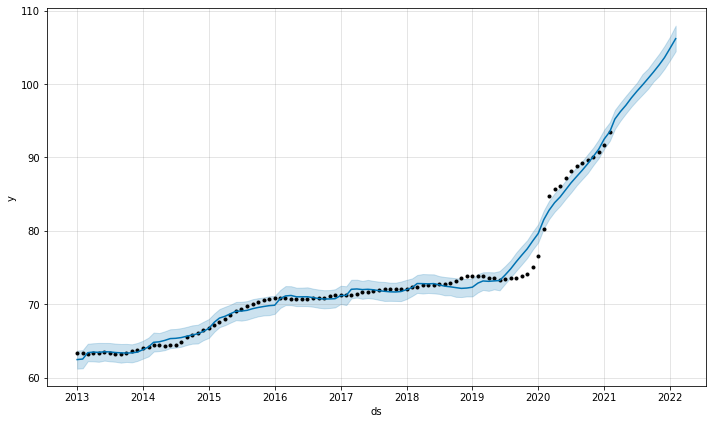

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
m.plot(forecast)
plt.xlim('2013-01-01','2022-02-01');

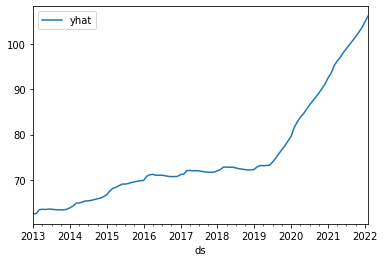

In [96]:
forecast.plot(x='ds',y='yhat');

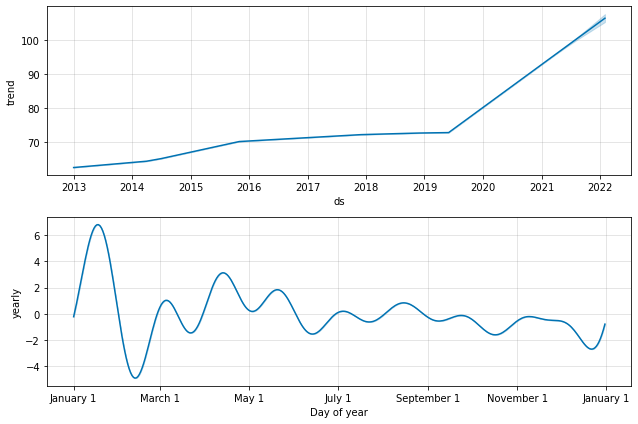

In [98]:
m.plot_components(forecast);


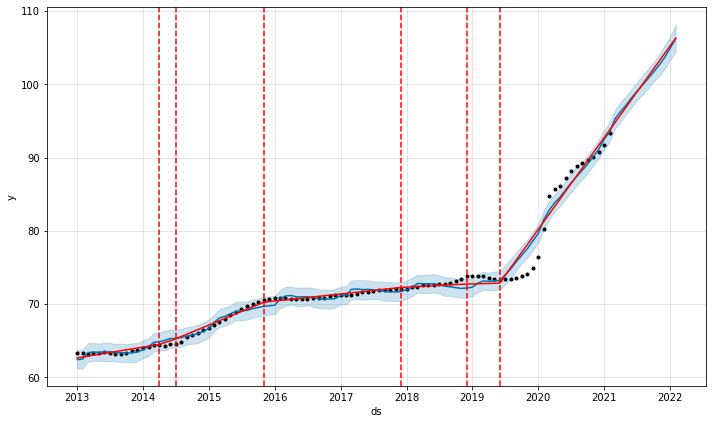

In [135]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

## Uncertainty Intervals
changepoint_prior_scale을 조절하면 예측 불확실성이 증가함

interval_width의 기본 값은 80%

### Uncertainty in the trend

In [136]:
  forecast = Prophet(interval_width=0.95).fit(df).predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Uncertainty in seasonality

시즈널리티의 불확실성을 알기 위해 베이지안 샘플링을 사용해야 함

mcmc.samples 파라미터를 사용. 이 값을 사용하면 최초 n일에 대해 적용한다는 뜻

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


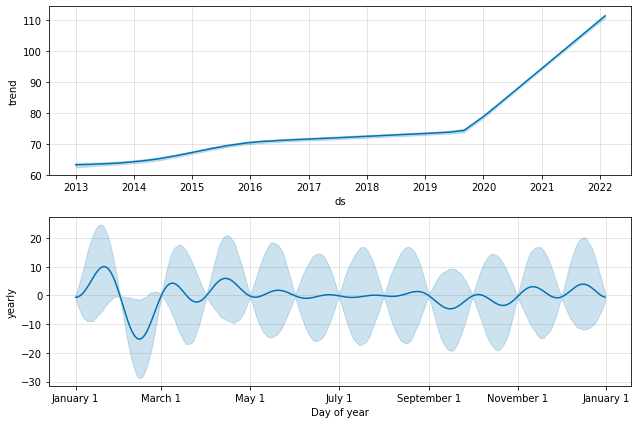

In [137]:
m = Prophet(mcmc_samples=300)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

## Outliers

너무 튀는 값이 존재해서 예측할 때 영향이 미치므로 제외하고 예측해야 함 ->NA, None로 설정

In [140]:
# df.loc[(df['ds'] > '2015-01-01') & (df['ds'] < '2016-01-01'), 'y'] = None
#  model = Prophet().fit(df)
#  fig = model.plot(model.predict(future))